In [1]:
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

In [34]:
iris = datasets.load_iris()
df = datasets.load_iris(return_X_y = True, as_frame = True)
df = pd.concat((df[0], df[1]), axis = 1)
df = pd.concat((df, pd.get_dummies(df['target'], prefix = 'target')), axis = 1)

In [37]:
df_org = df.copy(deep=True)

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Classifying 2 classes

In [40]:
df = df[df['target'] < 2]

In [41]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_0,target_1,target_2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,5.471000,3.099000,2.861000,0.786000,0.500000,0.500000,0.500000,0.0
std,0.641698,0.478739,1.449549,0.565153,0.502519,0.502519,0.502519,0.0
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000,0.0
25%,5.000000,2.800000,1.500000,0.200000,0.000000,0.000000,0.000000,0.0
50%,5.400000,3.050000,2.450000,0.800000,0.500000,0.500000,0.500000,0.0
75%,5.900000,3.400000,4.325000,1.300000,1.000000,1.000000,1.000000,0.0
max,7.000000,4.400000,5.100000,1.800000,1.000000,1.000000,1.000000,0.0


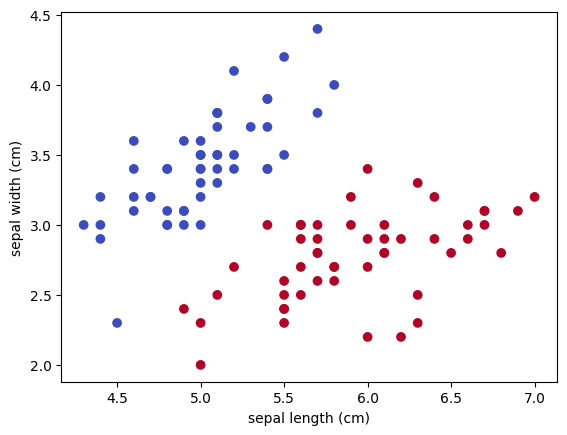

In [42]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], cmap='coolwarm')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [43]:
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['target']

In [44]:
df['target'].value_counts()

0    50
1    50
Name: target, dtype: int64

## Building a perceptron with sigmoid activation

In [45]:
model_per = tf.keras.Sequential([
tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid', use_bias=True),
])
model_per.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
sgd_per = tf.keras.optimizers.SGD(learning_rate=0.1)
model_per.compile(loss='binary_crossentropy', optimizer=sgd_per, metrics="accuracy")

In [47]:
history = model_per.fit(X, y, epochs=50, verbose=0, batch_size=20)

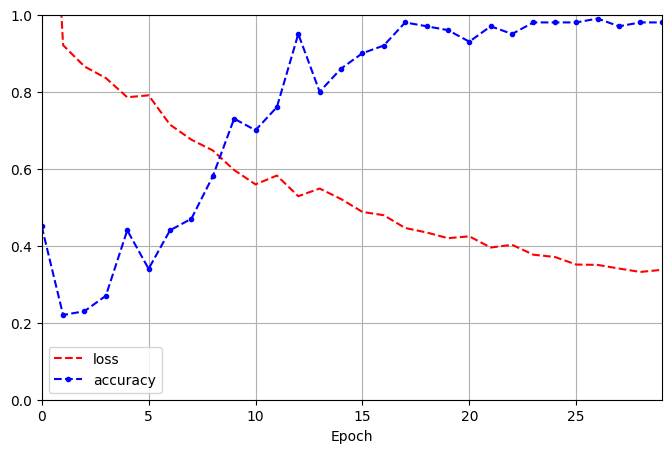

In [48]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "b--.", "g-", "b-*"])
plt.show()

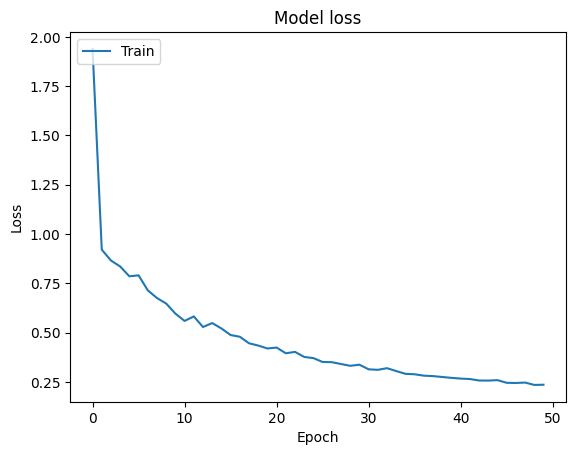

In [49]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [50]:
pred_df = pd.DataFrame(model_per.predict(X), columns=['target'])

4/4 [==============================] - 0s 3ms/step


In [51]:
pred_df["target"] = pred_df["target"] > 0.5

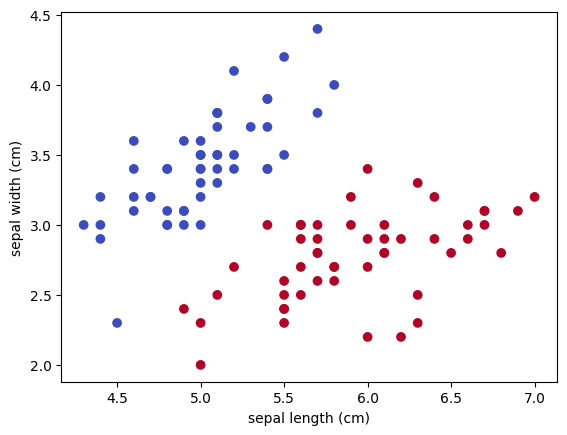

In [52]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'], cmap='coolwarm')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Classifying 3 classes
Are they linearly separable?

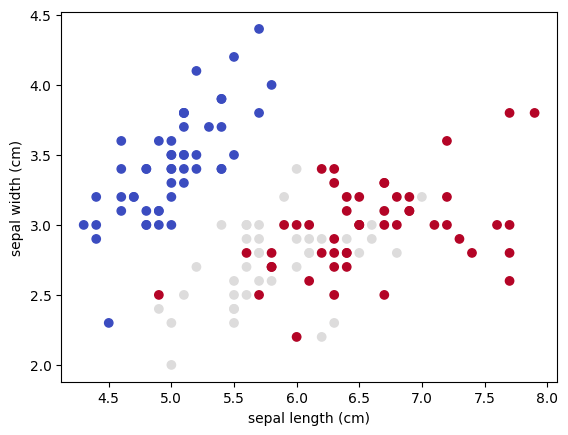

In [53]:
plt.scatter(df_org['sepal length (cm)'], df_org['sepal width (cm)'], c=df_org['target'], cmap='coolwarm')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [54]:
X = df_org[["sepal length (cm)", "sepal width (cm)"]]
y = df_org["target"]

In [55]:
# prompt: encode y as categorical

y = tf.keras.utils.to_categorical(y, num_classes=3)


In [60]:
model_per = tf.keras.Sequential([
tf.keras.layers.Dense(3, input_dim=2, activation='softmax', use_bias=True),
])
model_per.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
sgd_per = tf.keras.optimizers.SGD(learning_rate=0.1)
model_per.compile(loss='binary_crossentropy', optimizer=sgd_per, metrics="accuracy")

In [62]:
history = model_per.fit(X, y, epochs=50, verbose=0, batch_size=20)

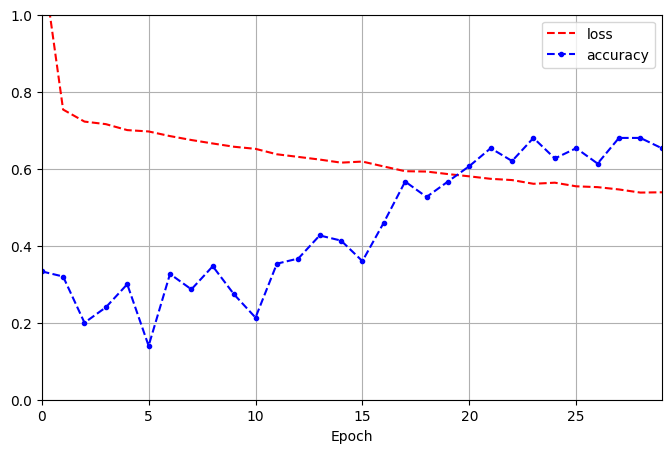

In [63]:
pd.DataFrame(history.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "b--.", "g-", "b-*"])
plt.show()

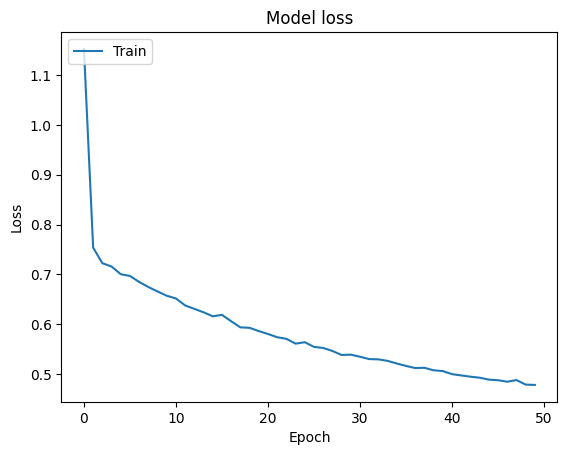

In [64]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [66]:
pred_df = pd.DataFrame(model_per.predict(X), columns=['0', '1', '2'])

5/5 [==============================] - 0s 7ms/step


In [67]:
submission_df = X

In [70]:
submission_df['target'] = pred_df.idxmax(axis=1).values.tolist()

AttributeError: 'list' object has no attribute 'astype'

In [71]:
submission_df['target'] = submission_df['target'].astype(int)

<ipython-input-71-8d3ec8c67699>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_df['target'] = submission_df['target'].astype(int)


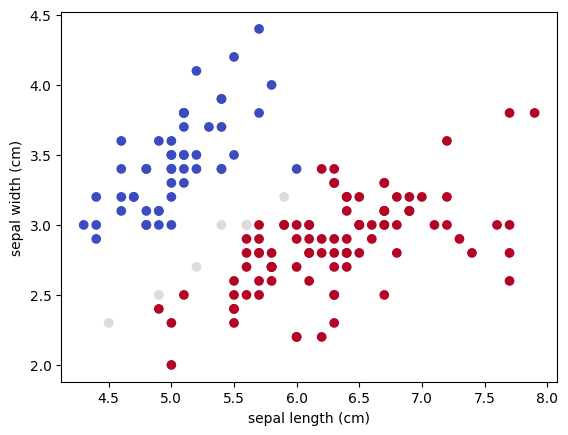

In [72]:
plt.scatter(submission_df['sepal length (cm)'], submission_df['sepal width (cm)'], c=submission_df['target'], cmap='coolwarm')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## early_stage_diabetes_risk_prediction (Tabular data in Deep Learning)
https://www.kaggle.com/datasets/tanshihjen/early-stage-diabetes-risk-prediction